## M345SC 2019 Lab 4

### Task 1: Shortest paths from BFS

The BFS code developed in lecture finds all reachable nodes from a source and computes the distance of the shortest path from the source to each reachable node:

In [1]:
import networkx as nx

def bfs(G,s):
    """
    Input:
    G: networkx graph
    x: source node

    Output:
    L2: Labels for all nodes in graph, 0=unreachable from source, 1=reachable
    L3: Shortest distance from source to nodes in graph
    """

    L1 = list(G.nodes) #Assumes nodes are numbered from 0 to N-1
    L2 = [0 for l in L1] #Labels
    L3 = [-1000 for l in L1] #Distances
    L4 = [[] for l in L1]
    L4[s]  = [s]
    
    Q=[]
    Q.append(s)
    L2[s]=1
    L3[s]=0
    while len(Q)>0:
        x = Q.pop(0) #remove node from front of queue
        for v in G.adj[x].keys():
            if L2[v]==0:
                Q.append(v) #add unexplored neighbors to back of queue
                L2[v]=1
                L3[v]=1+L3[x]
                L4[v].extend(L4[x]) #Add path to node x and node v to path
                L4[v].append(v)     #for node v

    return L2,L3,L4

1. Modify the function above so that it returns a list, *L4*, whose *i+1th* element, *L4[i]* contains a list of nodes for the shortest path between the source and node *i*. For example, L4=[[0],[0,2,3,1],[0,2],[0,3]] would indicate that the shortes path between nodes 0 and 1 is 0->2->3->1. 

In [2]:
#New function here
G = nx.barabasi_albert_graph(10, 3)
nx.draw(G, with_labels = True)
bfs(G, 4)

/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


([1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 2, 0, 2, 1, 1, 1, 2],
 [[4, 0],
  [4, 1],
  [4, 2],
  [4, 0, 3],
  [4],
  [4, 0, 5],
  [4, 6],
  [4, 7],
  [4, 8],
  [4, 0, 9]])

2. Test your function with a modestly-sized Barabasi-Albert graph and verify that it computes shortest-paths correctly:

In [ ]:
#Add code here
 

As you move to larger problems, memory usage becomes an increasingly important consideration when developing and analyzing codes. Generally, we wish to use as little memory as possible, but there are more subtle issues that can pop up as well.
Consider simple calculations with matrices. 2-D Numpy arrays store elements in *row-major* order which can influence the performance of seemingly similar operations with numpy arrays. Row-major order means that elements (i,j) and (i,j+1) are typically stored in adjacent locations in memory.

1) Construct a large *n x n* random matrix and: i) iterate across the rows of the matrix computing the standard deviation of each column and ii) iterate across the columns of the matrix computing the standard deviation of each row. Compare the walltime required by the two cases for a few different values of *n*. Is one case noticeably faster for large *n*?

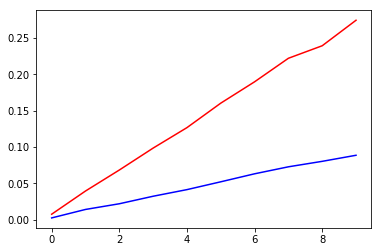

In [21]:
import numpy as np
from time import time
import matplotlib.pyplot as plt
#Add code here
N = 4000
time_row = []
time_col = []

for i in range(100, N, 400):
    
    Matrix = np.random.rand(N, N)
    time_1 = time()
    for j in range(i):
        x = np.std(Matrix[i, :])
    time_2 = time()
    for j in range(i):
        x = np.std(Matrix[:, i])
    time_3 = time()
    
    time_row.append(time_2 - time_1)
    time_col.append(time_3 - time_2)

plt.plot(time_row, 'b')
plt.plot(time_col, 'r')
plt.show()



2) Now, repeat the calculations above, but replace the loops across rows or columns with the built-in method for computing standard deviations with numpy arrays. Do the timing results change?

In [22]:
import numpy as np
from time import time
#add code here
N = 4000
time_row = []
time_col = []

for i in range(100, N, 200):
    
    Matrix = np.random.rand(N, N)
    time_1 = time()
    x = np.std(Matrix, axis = 0)
    time_2 = time()
    x = np.std(Matrix, axis = 1)
    time_3 = time()
    
    time_row.append(time_2 - time_1)
    time_col.append(time_3 - time_2)

plt.plot(time_row)
plt.plot(time_col)
plt.show()
